In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage.feature as skft

from utils.file_io import load_ground_truth
from experiments.mrf import StereoMRF

(288, 384)


/Library/Python/2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


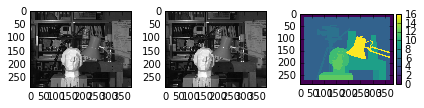

Image resolution: (288, 384)
Max disparity: 16


In [2]:
# Read left and right images as well as ground truth
img_left = skio.imread("experiments/tsuk_L.png", as_grey=True)
img_right = skio.imread("experiments/tsuk_R.png", as_grey=True)
ground_truth = load_ground_truth("experiments/tsuk_gt.pgm")
print(ground_truth.shape)


# since the images are too large, e.g. 1980 x 2880, scale them down
# NOTE: rescale the disparity too!
scale_down_factor = 1.0
if scale_down_factor != 1.0:
    from skimage.transform import rescale, resize
    img_left = rescale(img_left, 1.0/scale_down_factor, preserve_range=True)
    img_right = rescale(img_right, 1.0/scale_down_factor, preserve_range=True)
    ground_truth = rescale(ground_truth, 1.0/scale_down_factor, preserve_range=True)/scale_down_factor

ground_truth = ground_truth.astype('int16')

skio.imshow_collection([img_left, img_right, ground_truth])
plt.show()
print("Image resolution: {}".format(img_left.shape))
max_disp = np.max(ground_truth)
print("Max disparity: {}".format(max_disp))

/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LBP loop took nans on average


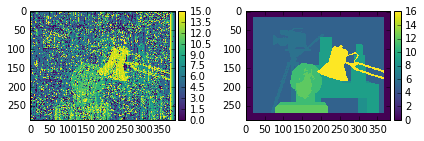

In [3]:
# Initialise a MRF and calculate the some (possible sub-optimal) disparity assignemnt
img_res = img_left.shape
mrf = StereoMRF(img_res, n_levels=max_disp)
disp_map = mrf.lbp(img_left, img_right, n_iter=0)
skio.imshow_collection([disp_map, ground_truth])
plt.show()

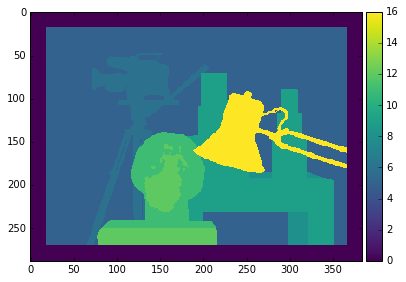

In [4]:
# Run the LBP algorithm again with the same image pair but provide a retina-like prior, 
# sampled from the ground truth + noise 
prior_density = 1
edges_mask = skft.canny(ground_truth.astype('float'), sigma=2)
prior = ground_truth * (np.random.uniform(size=img_left.shape) <= prior_density)
# prior = prior * edges_mask
# prior[~edges_mask] = 100
skio.imshow(prior)
plt.show()

((288, 384), (288, 384), (288, 384))
((288, 383), (288, 383), (288, 384))
((288, 382), (288, 382), (288, 384))
((288, 381), (288, 381), (288, 384))
((288, 380), (288, 380), (288, 384))
((288, 379), (288, 379), (288, 384))
((288, 378), (288, 378), (288, 384))
((288, 377), (288, 377), (288, 384))
((288, 376), (288, 376), (288, 384))
((288, 375), (288, 375), (288, 384))
((288, 374), (288, 374), (288, 384))
((288, 373), (288, 373), (288, 384))
((288, 372), (288, 372), (288, 384))
((288, 371), (288, 371), (288, 384))
((288, 370), (288, 370), (288, 384))
((288, 369), (288, 369), (288, 384))
LBP loop took nans on average


experiments/mrf.py:34: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 2; dimension is 384 but corresponding boolean dimension is 383
  self._message_field['data'][l, prior_mask_clipped] += \
experiments/mrf.py:35: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 2; dimension is 384 but corresponding boolean dimension is 383
  (1 - prior_factor) * data_contrib[prior_mask_clipped]
experiments/mrf.py:37: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 2; dimension is 384 but corresponding boolean dimension is 383
  self._message_field['data'][l, ~prior_mask_clipped] = data_contrib[~prior_mask_clipped]
experiments/mrf.py:34: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 2; dimension is 384 but corresponding boolean dimension is 382
  self._message_field['data'][l, prior_mask_clipped] += \
experiments/mrf.py:35: VisibleDeprecationWarning: bool

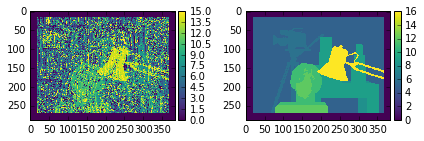

In [5]:
disp_map_with_prior = mrf.lbp(img_left, img_right, prior=prior, prior_factor=1, n_iter=0)
skio.imshow_collection([disp_map_with_prior, ground_truth])
plt.show()